## Customer Churn Prediction

1. Problem Statement

The objective of this project is to:
- Predict whether a telecom customer will churn (leave the service) or stay based on demographic, service usage, and billing information.
- Identify key factors that contribute to customer churn.
- Provide actionable insights to improve customer retention.


2. Data Collection

- Dataset: Telco Customer Churn
- Source: Kaggle
- Rows: ~7000 customers

import data and required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

load the dataset

In [2]:
df=pd.read_csv("data/data.csv")

In [3]:
#show all columns whenever i use head() or tail()
pd.set_option('display.max_columns',None)


In [4]:
#display top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#show buttom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

the dataset has total 7043 rows and only 21 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


most of the features are of object type, only 3 features are numeric type. All the columns are non-null.

In [8]:
#checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

this dataset don't have any missing value

In [9]:
df.duplicated().sum()

np.int64(0)

the dataset don't have duplicates rows too.

In [10]:
#checking the number of unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
#convert numeric strings to float
#convert invalid entries like spaces to NaN automatically

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
print(df['TotalCharges'].isnull().sum())

11


Earlier when TotalCharges was of type object there were no null values but once it change it to numeric with errors=coerce, it turns non-numeric values like spaces to NaN so now we can observe 11 null values in this specific column.

## Handling null values of TotalCharges Column

Since only 11 rows are null so, it will be better to drop as it will not impact the result much.

But if we try to fill with mean, median then it may distort the data.

In [13]:
df=df.dropna(subset=['TotalCharges'])

In [14]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [15]:
#check descriptive statistics of numeric columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- SeniorCitizen is actually a categorical column hence the 25%-50%-75% distribution is not proper.
- 75% customers have tenure less than 55
- Average monthly charges are 64.76 whereas 25% of customers pay more than 89.85 per month.

## Exploring data

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


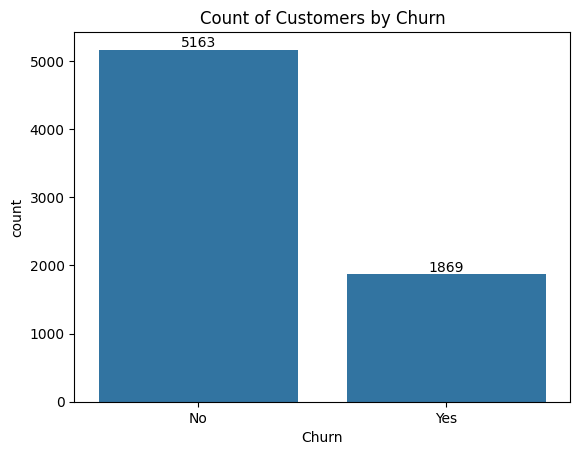

In [17]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Churn')
plt.show()

- The target column is highly imbalanced. The model will likely predict NO for all the data if its not corrected.

In [18]:
#Since the customerID column is not relevant so we can simply drop it as:
df.drop(columns=['customerID'],axis=1,inplace=True)

In [19]:
df.shape

(7032, 20)

In [20]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
#select categorical columns
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)*100)


Column: gender
gender
Male      3549
Female    3483
Name: count, dtype: int64
gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64

Column: Partner
Partner
No     3639
Yes    3393
Name: count, dtype: int64
Partner
No     51.749147
Yes    48.250853
Name: proportion, dtype: float64

Column: Dependents
Dependents
No     4933
Yes    2099
Name: count, dtype: int64
Dependents
No     70.150739
Yes    29.849261
Name: proportion, dtype: float64

Column: PhoneService
PhoneService
Yes    6352
No      680
Name: count, dtype: int64
PhoneService
Yes    90.32992
No      9.67008
Name: proportion, dtype: float64

Column: MultipleLines
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
MultipleLines
No                  48.137088
Yes                 42.192833
No phone service     9.670080
Name: proportion, dtype: float64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2416
No           

## Insights:
- Since the proportion of male and female are almost equal so customer churn don't depend on gender.

- In case of having partner also, it doesnot affect churn.

- MultipleLines, InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,,TechSupport,StreamingTV,StreamingMovies, the class seems to be balanced. There is not that significant differences in values among the classes.

- In case of dependents,PhoneService, the classes are imbalanced.

- In case of type of contract, one class has almost 55% and other two has only around 22% which might impact churn.

## Univariate and Bivariate Analysis

In [22]:
def conv(value):
    if value==1:
        return 'Yes'
    else:
        return 'No'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)


Text(0.5, 1.0, 'Churn By SeniorCitizen')

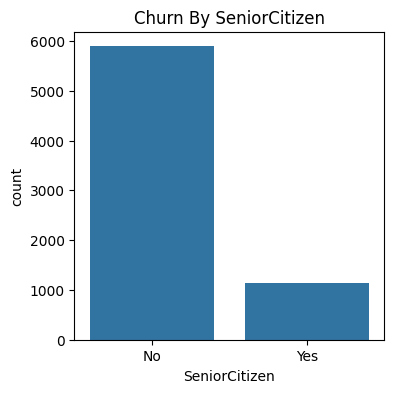

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen',data=df)
plt.title('Churn By SeniorCitizen')


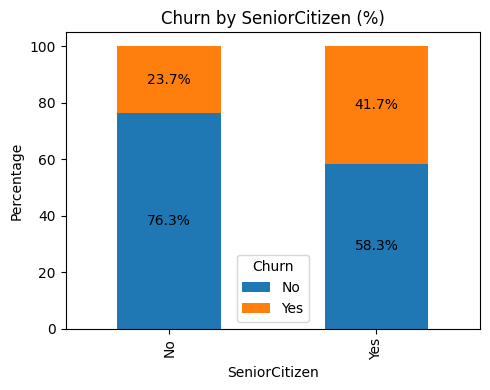

In [24]:
# Create percentage table
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by SeniorCitizen (%)')
plt.ylabel('Percentage')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- Senior citizens show a higher churn percentage compared to non-senior customers, indicating the need for targeted retention strategies.

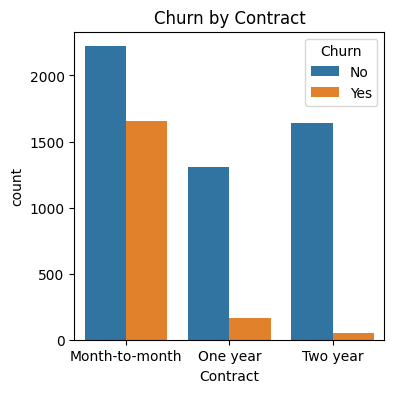

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(x='Contract',data=df,hue='Churn')
plt.title("Churn by Contract")
plt.show()

- Customers of month-to-month contract are more likely to churn in compared to ones with one year or two year contract.

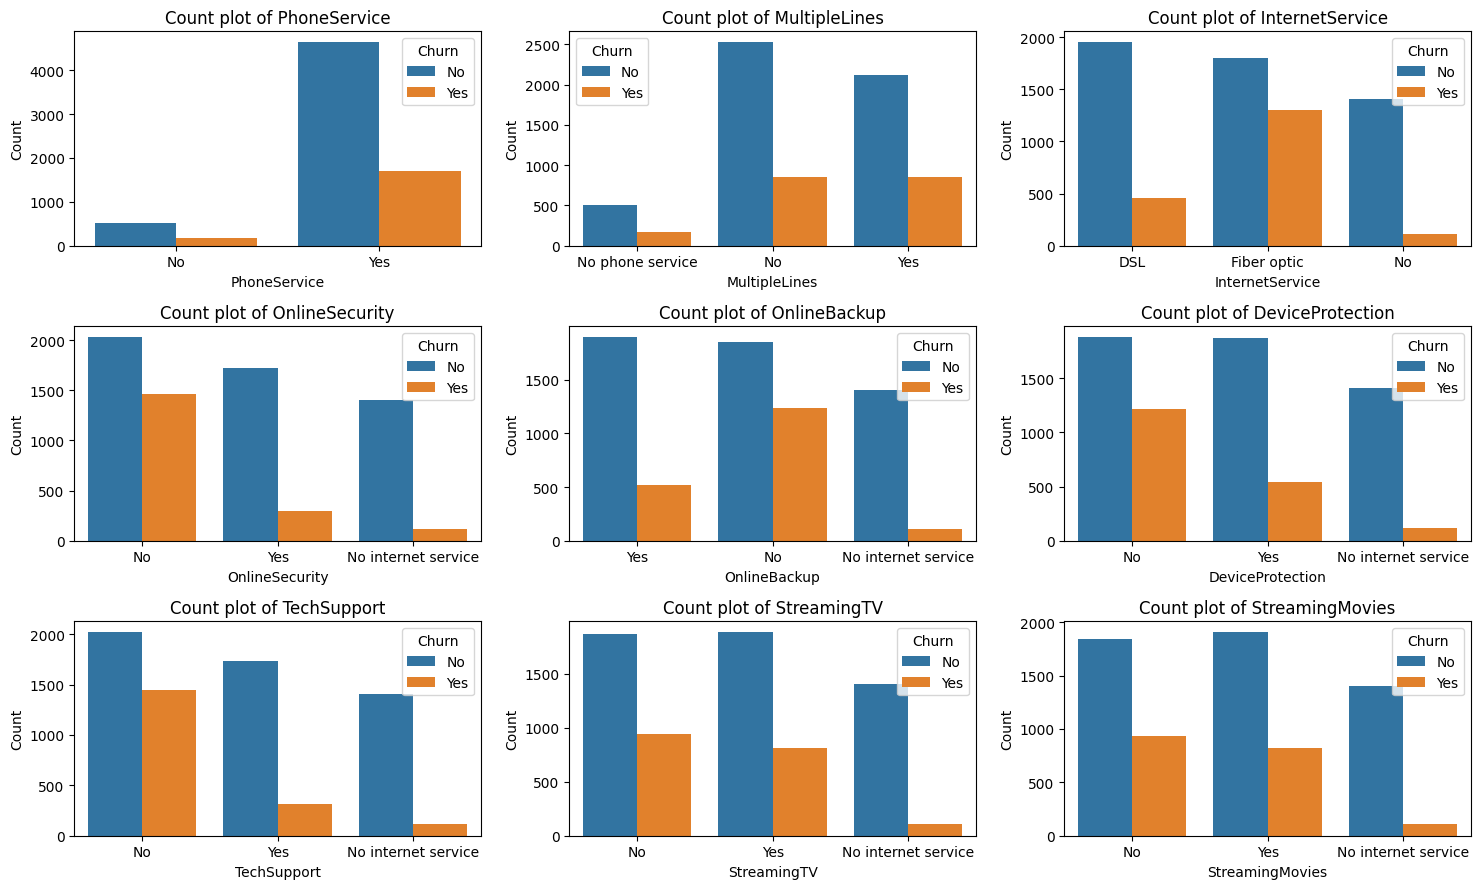

In [26]:
columns = [
    'PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies'
]

n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(
        x=col,
        hue='Churn',
        data=df,
        ax=axes[i]
    )
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove extra empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

- The majority of customers who do not churn tend to have services like PhoneService, InternetService, and OnlineSecurity enabled. For services like OnlineSecurity, DeviceProtection, OnlineBackup, TechSupport, StreamingTV, and StreamingMovies churn rates are noticeably higher when these are not used or unavailable.

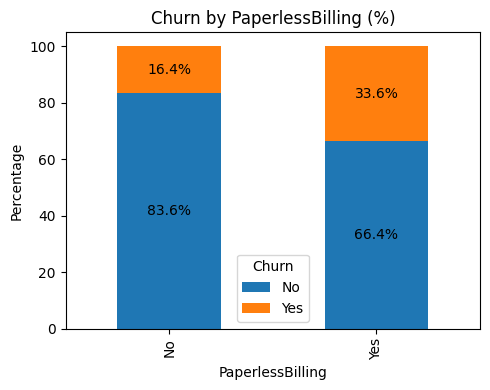

In [27]:
# Create percentage table
ct = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by PaperlessBilling (%)')
plt.ylabel('Percentage')
plt.xlabel('PaperlessBilling')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

- The customer with PaperlessBilling is more likely to churn.

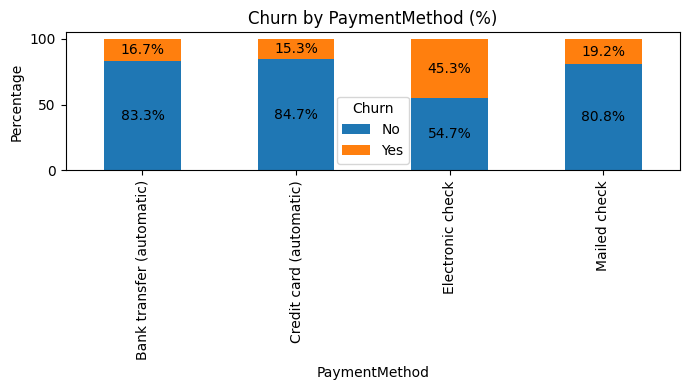

In [28]:
# Create percentage table
ct = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Plot stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(7,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center')

plt.title('Churn by PaymentMethod (%)')
plt.ylabel('Percentage')
plt.xlabel('PaymentMethod')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

-  Customer with ElectronicCheck type of payment is more likely to churn in compared to others

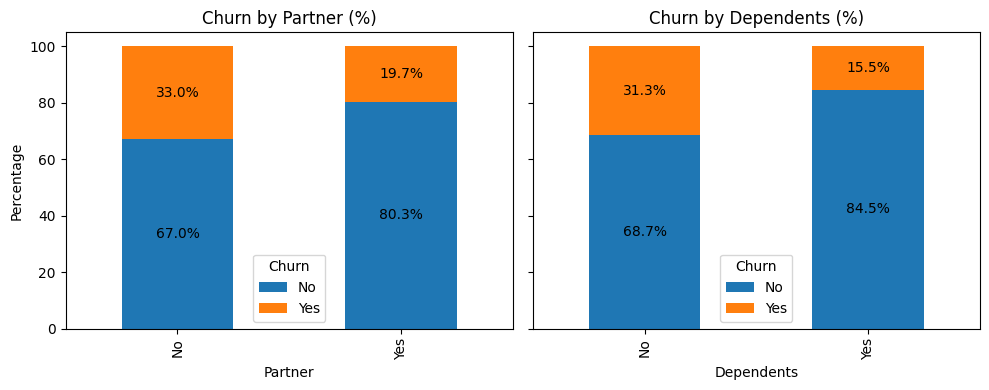

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

cols = ['Partner', 'Dependents']

for i, col in enumerate(cols):
    # Create percentage table
    ct = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Plot stacked bar chart
    ax = ct.plot(kind='bar', stacked=True, ax=axes[i])

    # Add percentage labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

    ax.set_title(f'Churn by {col} (%)')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentage')
    ax.legend(title='Churn')

plt.tight_layout()

- Customers with no partners and no dependents are more likely to churn.
This suggests that customers with family ties tend to stay longer, possibly because they rely more on consistent telecom services and are less price-sensitive.

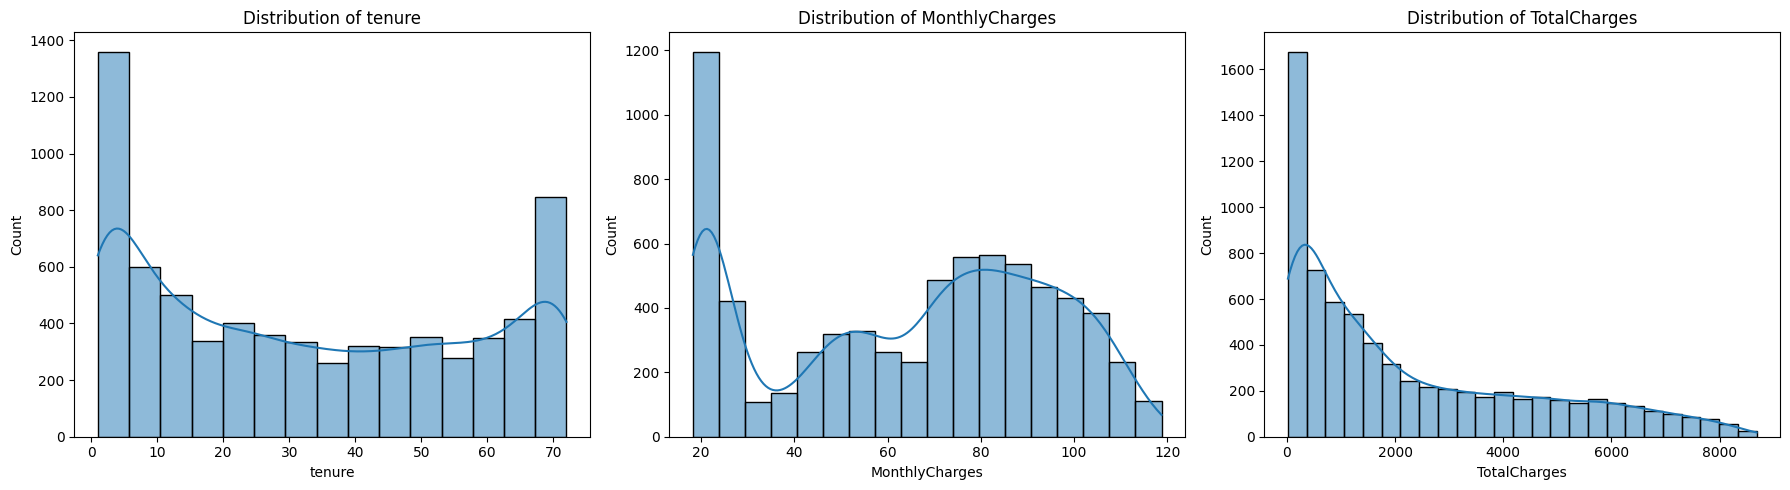

In [30]:
columns = ['tenure','MonthlyCharges', 'TotalCharges'] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True,         
       ax=axs[i]
    )
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()

- MonthlyCharges show multimodal distribution while TotalCharges show right skewness.
- People who has used services for short period of time has churned in large rate.

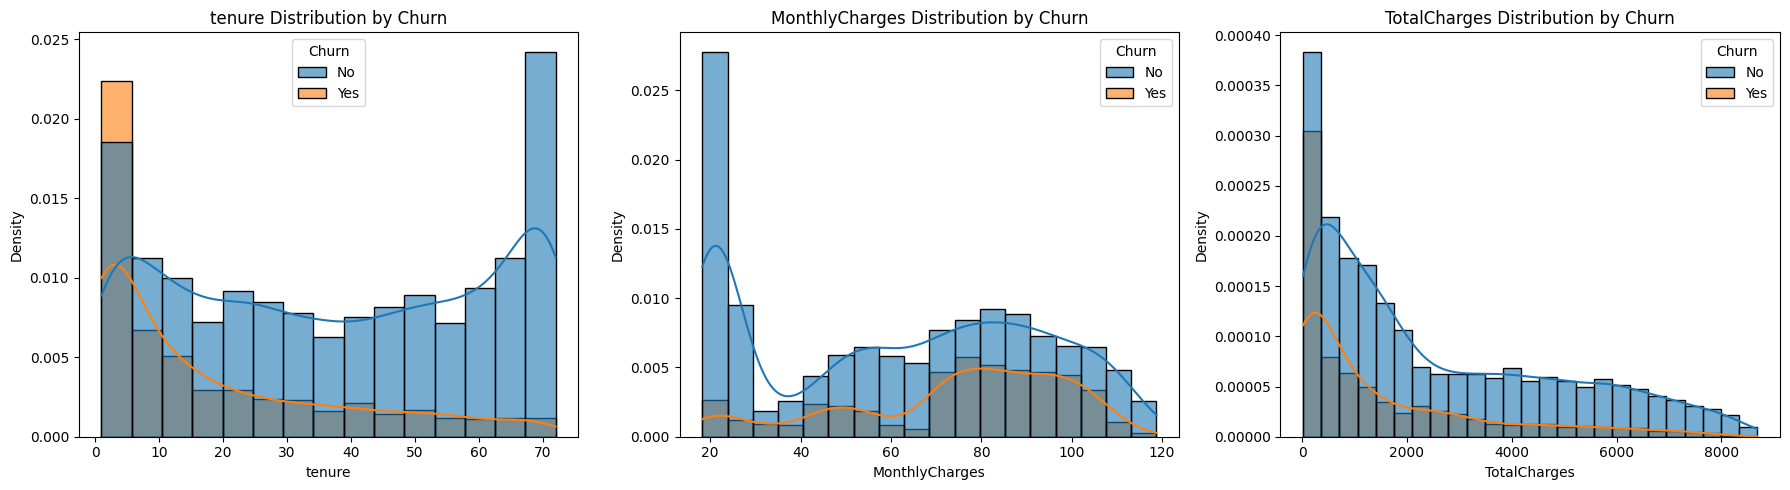

In [31]:
columns = ['tenure', 'MonthlyCharges', 'TotalCharges'] 

fig, axs = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(columns):
    sns.histplot(
        data=df, 
        x=col, 
        kde=True, 
        hue='Churn',          
        stat='density',       # normalize distributions
        alpha=0.6,            # transparency for overlap
        ax=axs[i]
    )
    axs[i].set_title(f'{col} Distribution by Churn')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')

plt.tight_layout()

- Customers tend to churn mostly in the early months.
- The customers with higher monthly charges tend to churn.
- Customers with low TotalCharges, which corresponds to short tenure, show significantly higher churn risk, while long-tern customers rarely churn.

## Outliers Analysis

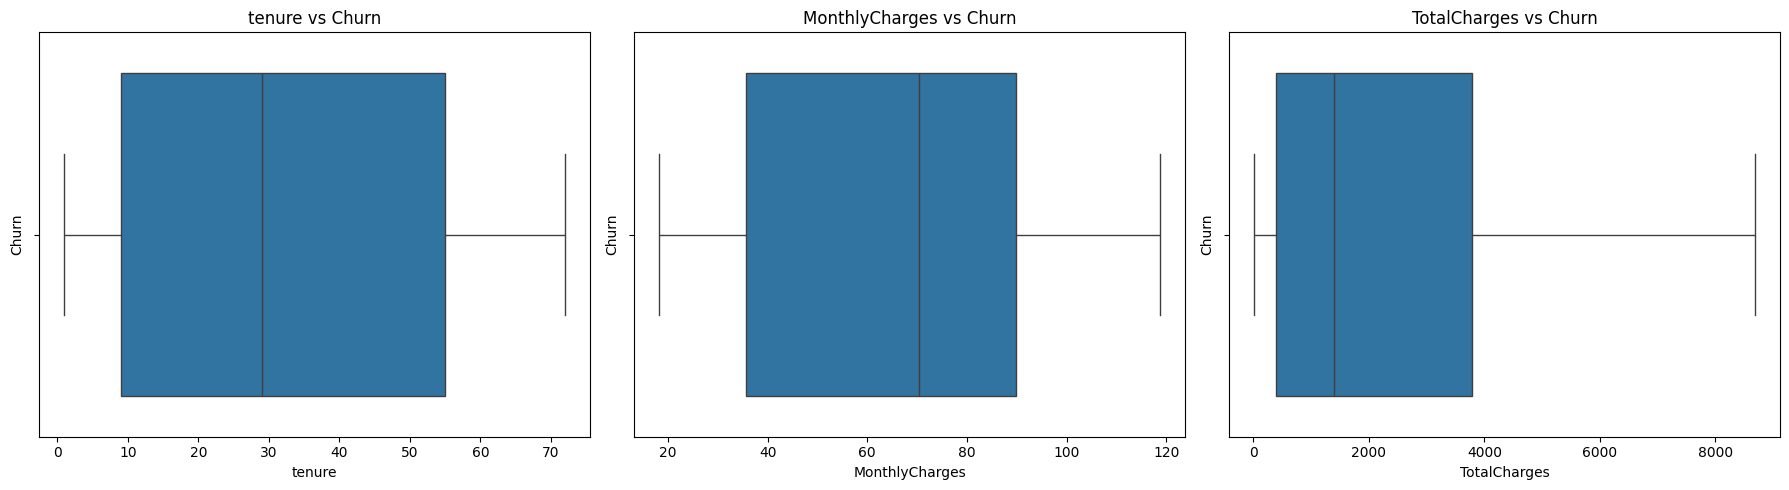

In [ ]:
columns=['tenure','MonthlyCharges','TotalCharges']
fig,axs=plt.subplots(1,3,figsize=(18,5))

for i,col in enumerate(columns):
    #sns.boxplot(x='Churn',y=col,data=df,ax=axs[i])
    sns.boxplot(x=col,data=df,ax=axs[i])
    axs[i].set_title(f'{col} vs Churn')
    axs[i].set_ylabel('Churn')
    axs[i].set_xlabel(col)
plt.tight_layout()

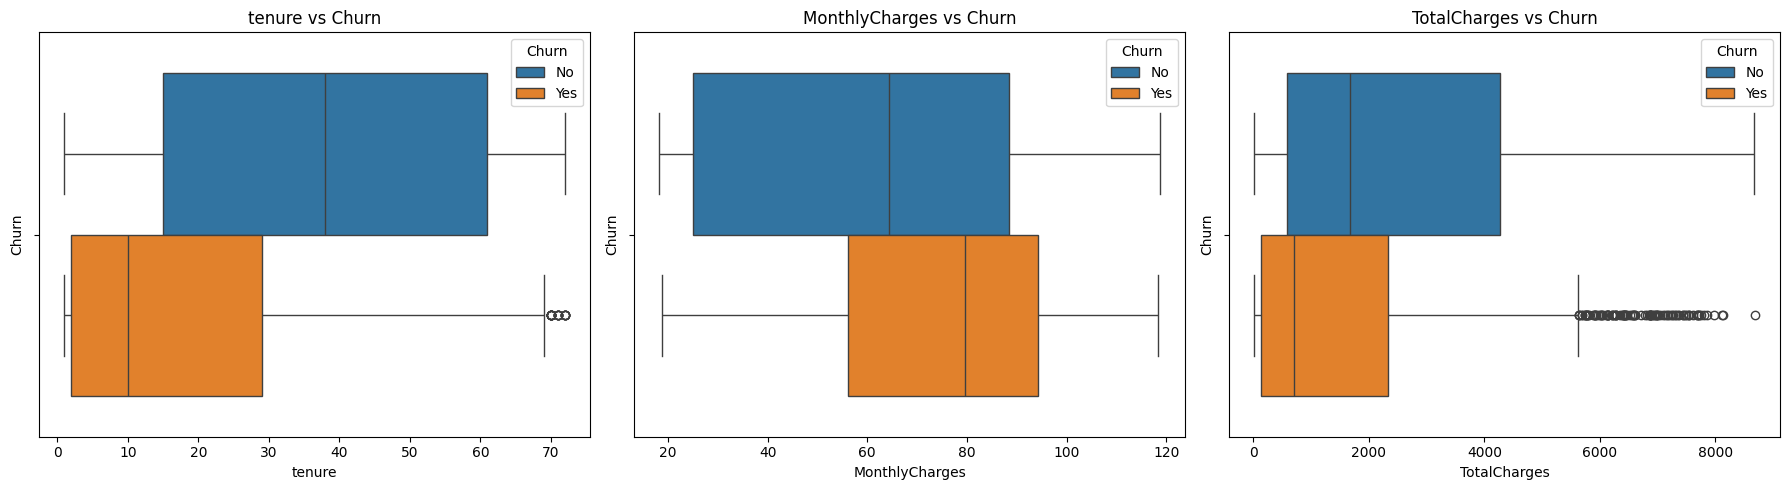

In [36]:
columns=['tenure','MonthlyCharges','TotalCharges']
fig,axs=plt.subplots(1,3,figsize=(18,5))

for i,col in enumerate(columns):
    sns.boxplot(x=col,data=df,ax=axs[i],hue='Churn')
    axs[i].set_title(f'{col} vs Churn')
    axs[i].set_ylabel('Churn')
    axs[i].set_xlabel(col)
plt.tight_layout()

- When I used boxplot with hue=Churn then, I noticed some points lie above the upper whisker,especially in the 'Yes' churn category. These high-end points are potential outliers, but they likely represent real customers with long tenure or high charges.
